# CREDIT CARD FRAUD DETECTION

## Using Unbalanced and Unstructured Data

### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing"
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn

### Loading the dataset

In [2]:
df=pd.read_csv('fraudTest.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Feature Selection

In [3]:
fs=['cc_num','amt','lat','long','merch_lat','merch_long','is_fraud']
ds=df[fs]
ds

,cc_num,amt,lat,long,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,33.9659,-80.9355,33.986391,-81.200714,0
1,3573030041201292,29.84,40.3207,-110.4360,39.450498,-109.960431,0
2,3598215285024754,41.28,40.6729,-73.5365,40.495810,-74.196111,0
3,3591919803438423,60.05,28.5697,-80.8191,28.812398,-80.883061,0
4,3526826139003047,3.19,44.2529,-85.0170,44.959148,-85.884734,0
...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,39.946837,-91.333331,0
555715,3556613125071656,111.84,29.0393,-95.4401,29.661049,-96.186633,0
555716,6011724471098086,86.88,46.1966,-118.9017,46.658340,-119.715054,0
555717,4079773899158,7.99,44.6255,-116.4493,44.470525,-117.080888,0


In [4]:
ds['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Visualizations

<Axes: xlabel='is_fraud', ylabel='count'>

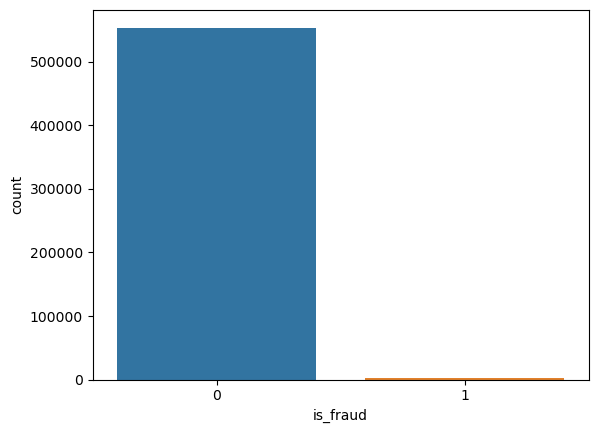

In [5]:
sns.countplot(x='is_fraud',data=ds)

## Balancing the Dataset

In [6]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
ds_majority = ds[(ds['is_fraud']==0)] 
ds_minority = ds[(ds['is_fraud']==1)] 
# upsample minority class
ds_minority_upsampled = resample(ds_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 553574, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
ds_upsampled = pd.concat([ds_minority_upsampled, ds_majority])

In [7]:
ds_upsampled

,cc_num,amt,lat,long,merch_lat,merch_long,is_fraud
197591,6596735789587928,284.36,44.9595,-93.8482,45.917657,-94.364030,1
285433,30011465039817,16.54,42.3496,-73.5873,43.040195,-74.514274,1
259834,586100864972,836.83,42.0695,-75.7967,42.347743,-75.748297,1
256926,676369110710,311.85,42.4969,-83.2911,42.455382,-82.862173,1
354097,38859492057661,276.62,42.1808,-112.2620,42.079236,-112.961883,1
...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,39.946837,-91.333331,0
555715,3556613125071656,111.84,29.0393,-95.4401,29.661049,-96.186633,0
555716,6011724471098086,86.88,46.1966,-118.9017,46.658340,-119.715054,0
555717,4079773899158,7.99,44.6255,-116.4493,44.470525,-117.080888,0


<Axes: xlabel='is_fraud', ylabel='count'>

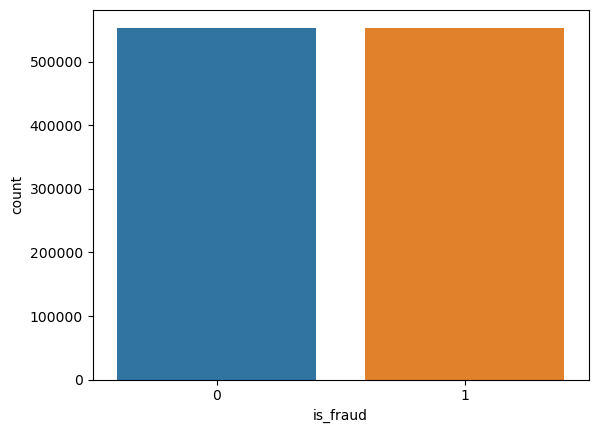

In [8]:
sns.countplot(x='is_fraud',data=ds_upsampled)

<Axes: xlabel='variable', ylabel='value'>

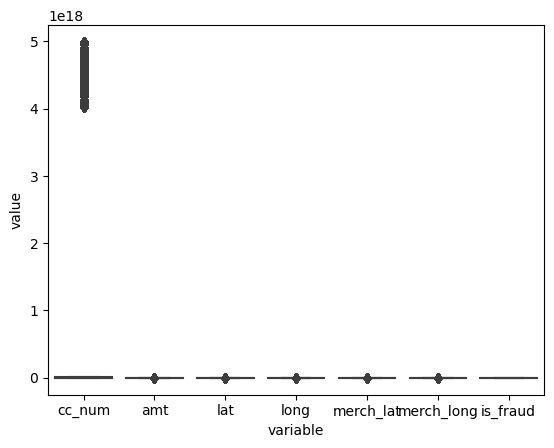

In [9]:
#b=ds_upsampled.drop(columns='cc_num',axis=1)
sns.boxplot(x="variable", y="value", data=pd.melt(ds_upsampled))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


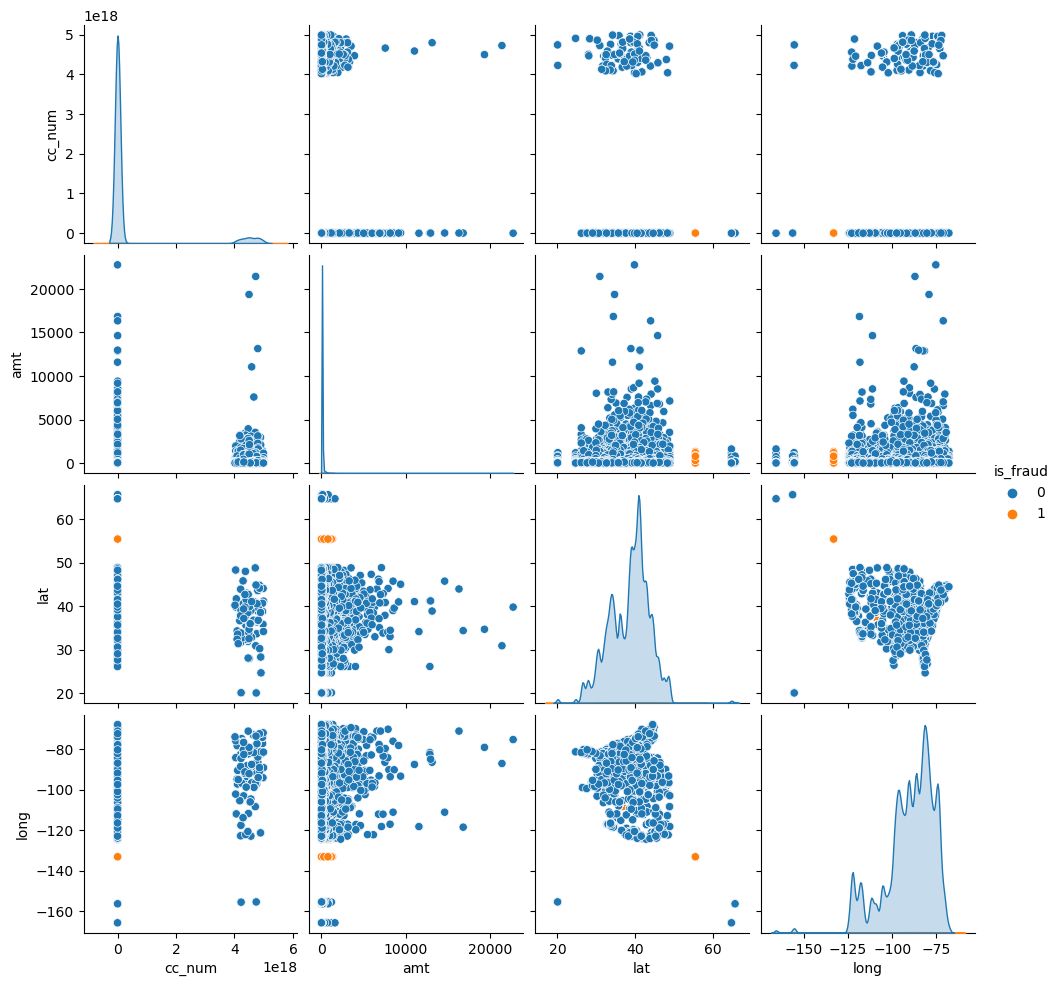

In [10]:
# Cols to Plot 
columns_to_plot =['cc_num','amt','lat','long','is_fraud']

# Data Columns
data_to_plot = df[columns_to_plot]

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='is_fraud')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


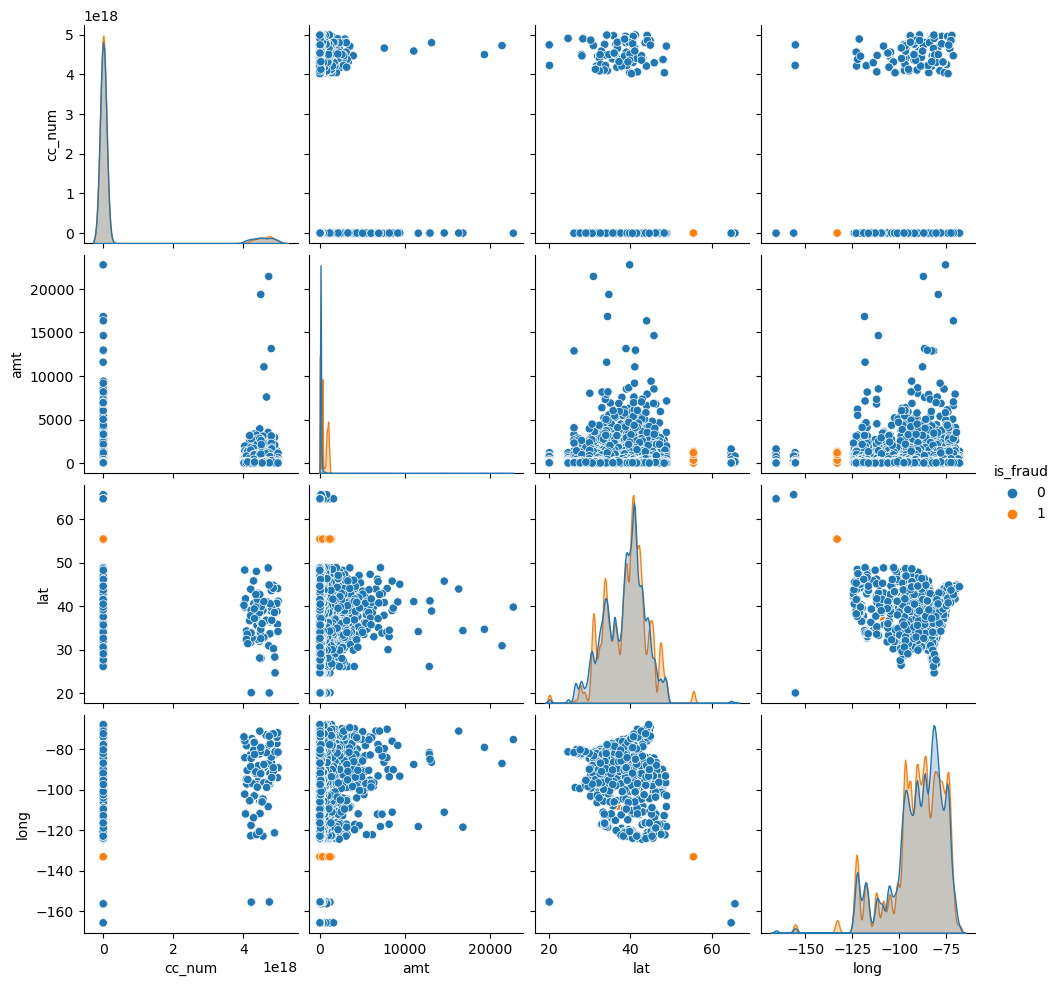

In [11]:
columns_to_plot =['cc_num','amt','lat','long','is_fraud']

# Data Columns
data_to_plot = ds_upsampled[columns_to_plot]

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='is_fraud')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Spliting and Training the Data

In [13]:

X=ds_upsampled.drop(columns='is_fraud',axis=1)
y=ds_upsampled['is_fraud']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Ensemble Method

### By Using VotingClassifier

In [14]:
#Ensemble Method
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
rf = RandomForestClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('xgb', xgb)], voting='hard')# Train the ensemble model
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [15]:
# Fitting the data into all the models
rf.fit(X_train, y_train)#Random Forest
lr.fit(X_train, y_train)#Logistic Regression
xgb.fit(X_train, y_train)#XGBoost

#predicting the dataset for the tested dataset
y_p4=ensemble.predict(X_test)
y_p3=xgb.predict(X_test)
y_p2=lr.predict(X_test)
y_p1=rf.predict(X_test)
print("Tested Data accuracy's of all the Models:")
print("For Random Forest: ",accuracy_score(y_test,y_p1)*100)
print("For Logistic Regression: ",accuracy_score(y_test,y_p2)*100)
print("For XGBoost: ",accuracy_score(y_test,y_p3)*100)
print("For Ensemble Model: ",accuracy_score(y_test,y_p4)*100)

Tested Data accuracy's of all the Models:
For Random Forest:  99.94761324120489
For Logistic Regression:  85.04809646389378
For XGBoost:  98.8718782459468
For Ensemble Model:  99.56555118999232


In [16]:
# predicting the dataset for the Trained dataset
y_p4=ensemble.predict(X_train)
y_p3=xgb.predict(X_train)
y_p2=lr.predict(X_train)
y_p1=rf.predict(X_train)
print("Trained Data accuracy's of all the Models:")
print("For Random Forest: ",accuracy_score(y_train,y_p1)*100)
print("For Logistic Regression: ",accuracy_score(y_train,y_p2)*100)
print("For XGBoost: ",accuracy_score(y_train,y_p3)*100)
print("For Ensemble Model: ",accuracy_score(y_train,y_p4)*100)

Trained Data accuracy's of all the Models:
For Random Forest:  100.0
For Logistic Regression:  85.24733605955846
For XGBoost:  98.93803671145895
For Ensemble Model:  99.61872740533668


## Retriving the data which are affecting the accuracy of the data

In [20]:
#logistic regression
l=[]
y_test=list(y_test)
for i in range(len(y_p1)):
    if y_p1[i] != y_test[i]:
        l.append(i)

len(l)

IndexError: list index out of range

In [ ]:
#Random Forest
r=[]
y_test=list(y_test)
for i in range(len(y_p4)):
    if y_pred2[i] != y_test[i]:
        r.append(i)
        
len(r)

In [ ]:
#XGBoost
x=[]
y_test=list(y_test)
for i in range(len(y_p4)):
    if y_pred3[i] != y_test[i]:
        x.append(i)
        
len(x)

In [ ]:
#Ensemble
e=[]
y_test=list(y_test)
for i in range(len(y_pred)):
    if y_pred4[i] != y_test[i]:
        e.append(i)

len(e)

In [ ]:
# Common data that affecting the accuracy of the Models.
no=[]
for i in r:
    if (i in l) and (i in x) and (i in e):
        no.append(i)
        #print(i)
print("The rows that are affecting the accuracy of the models",len(no))